In [4]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy() # Filter for Data Scientists in the US

df_DS_US = df_DS_US.dropna(subset=['salary_hour_avg'])

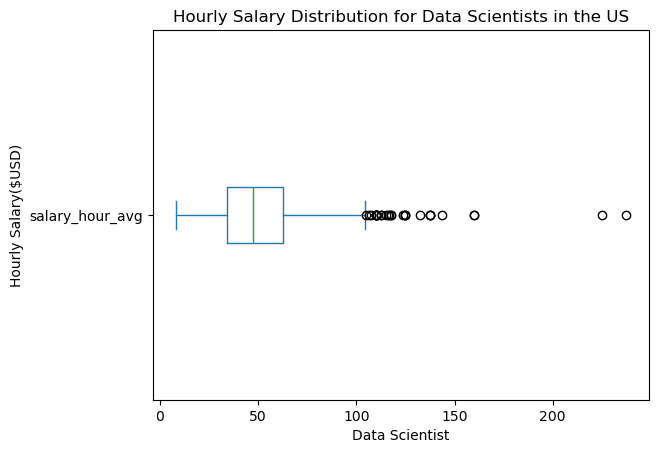

In [10]:
df_DS_US['salary_hour_avg'].plot(kind='box', vert=False)
plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary($USD)')
plt.title('Hourly Salary Distribution for Data Scientists in the US')
plt.show()